# **🧠 Correlação e Tabulação Cruzada**

A análise de dados tem como objetivo compreender relações entre variáveis e identificar padrões ou tendências.
Duas ferramentas muito utilizadas nesse processo são a correlação e a tabulação cruzada.

🔹 Correlação

A correlação mede o grau de associação entre variáveis.
No contexto de dados categóricos (como Classe e Sobrevivência no Titanic), não calculamos um coeficiente numérico direto — em vez disso, usamos mapas de calor (heatmaps) para visualizar como as categorias se relacionam.

Por exemplo:

* Um mapa de calor entre Classe e Sobrevivência mostra a proporção de sobreviventes em cada classe.

* Um mapa de calor entre Classe e Valor do Ticket revela como o preço médio do bilhete varia entre as classes.

Essas visualizações ajudam a responder perguntas como:

“Passageiros de classes mais altas tiveram mais chances de sobreviver?”
“Os preços dos bilhetes estão diretamente relacionados à classe social a bordo?”

🔹 Tabulação Cruzada (Crosstab)

A tabulação cruzada é uma forma de sumarizar os dados de duas ou mais variáveis categóricas em uma tabela de contingência.
No Python, utilizamos a função pd.crosstab() da biblioteca pandas para isso.

Ela permite:

* Contar o número de ocorrências em cada combinação de categorias;

* Calcular proporções e taxas (por exemplo, a taxa de sobrevivência dentro de cada grupo);

* Criar representações gráficas (barras, mapas de calor etc.).

Por exemplo:

`pd.crosstab(df['Sex'], df['Survived']) `
mostra quantos homens e mulheres sobreviveram.

`pd.crosstab([df['Pclass'], df['Sex']], df['Survived'], normalize='index') `calcula a porcentagem de sobreviventes por classe e sexo.

Essas análises são fundamentais em Ciência de Dados, pois permitem interpretar relações entre variáveis e tirar conclusões baseadas em evidências.

# 💻 Importação das bibliotecas e configuração do ambiente
Pandas ,seaborn y matplotlib

In [ ]:
# Imports e configuração
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar gráficos inline
%matplotlib inline

# Estética para os gráficos
sns.set(style="whitegrid", context="notebook")


# 📂 Leitura do dataset Titanic e normalização dos nomes das colunas

In [ ]:
# Leitura do CSV e normalização dos nomes de colunas (Title Case)
df = pd.read_csv('titanic.csv')

# Normalizar nomes: por exemplo 'survived' -> 'Survived'
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')   # normaliza a snake_case
df.columns = [c.title().replace('_','') for c in df.columns]

print("Dimensões do dataset:", df.shape)
df.head()


Dimensões do dataset: (891, 15)


,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,AdultMale,Deck,EmbarkTown,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 🔍 Inspeção inicial e informações básicas do dataset

In [ ]:
# Informações gerais
print("Colunas disponíveis:", list(df.columns))
print("\nInformações básicas:")
display(df.info())

# Mostrar resumo estatístico (colunas numéricas)
display(df.describe(include='all').T)



Colunas disponíveis: ['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked', 'Class', 'Who', 'AdultMale', 'Deck', 'EmbarkTown', 'Alive', 'Alone']

Informações básicas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   Sibsp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Class       891 non-null    object 
 9   Who         891 non-null    object 
 10  AdultMale   891 non-null    bool   
 11  Deck        203 non-null    object 
 12  EmbarkTown  889 non-null    object 
 13  Alive       891 non-null    object 
 14  Alone       891 non-null    bool   
dtypes: boo

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
Sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🧹 Pré-processamento (seleção e limpeza de dados)

In [ ]:
# Selecionar colunas que vamos usar -- com Title Case: Survived, Pclass, Fare, Sex, Age
# Caso alguma coluna não exista, avisamos e adaptamos.
needed = ['Survived','Pclass','Fare','Sex','Age']
present = [c for c in needed if c in df.columns]

print("Colunas necessárias presentes:", present)

# Copiamos as colunas presentes para um novo df de trabalho
df_work = df[present].copy()

# Garantir tipos:
if 'Survived' in df_work.columns:
    df_work['Survived'] = pd.to_numeric(df_work['Survived'], errors='coerce').astype('Int64')
if 'Pclass' in df_work.columns:
    df_work['Pclass'] = pd.to_numeric(df_work['Pclass'], errors='coerce').astype('Int64')
if 'Fare' in df_work.columns:
    df_work['Fare'] = pd.to_numeric(df_work['Fare'], errors='coerce')
if 'Sex' in df_work.columns:
    df_work['Sex'] = df_work['Sex'].astype(str)
if 'Age' in df_work.columns:
    df_work['Age'] = pd.to_numeric(df_work['Age'], errors='coerce')

# Remover linhas com NA **apenas** nas colunas essenciais (evita dropar tudo desnecessariamente)
df_work.dropna(subset=[c for c in ['Survived','Pclass','Fare','Sex','Age'] if c in df_work.columns], inplace=True)

print("Dimensões após limpeza:", df_work.shape)
df_work.head()



Colunas necessárias presentes: ['Survived', 'Pclass', 'Fare', 'Sex', 'Age']
Dimensões após limpeza: (714, 5)


,Survived,Pclass,Fare,Sex,Age
0,0,3,7.2500,male,22.0
1,1,1,71.2833,female,38.0
2,1,3,7.9250,female,26.0
3,1,1,53.1000,female,35.0
4,0,3,8.0500,male,35.0


# 🔥 Atividade 1 – Mapas de Calor (Correlação Visual)

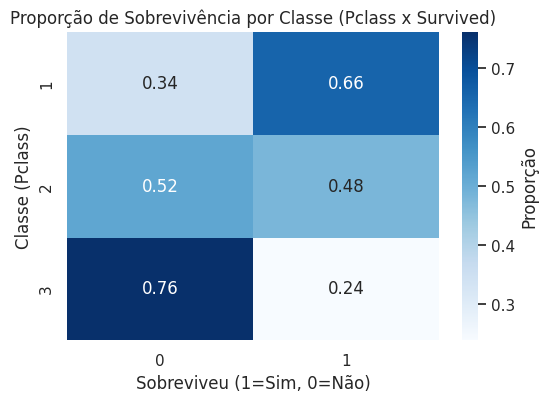

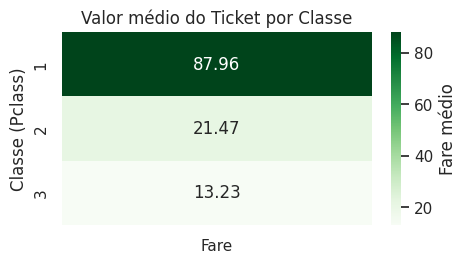

In [ ]:
# Atividade 1.1: Classe x Sobrevivência (proporção por classe)
if set(['Pclass','Survived']).issubset(df_work.columns):
    corr1 = pd.crosstab(df_work['Pclass'], df_work['Survived'])
    corr1_prop = corr1.div(corr1.sum(axis=1), axis=0)  # proporção por linha (por classe)
    plt.figure(figsize=(6,4))
    sns.heatmap(corr1_prop, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label':'Proporção'})
    plt.title('Proporção de Sobrevivência por Classe (Pclass x Survived)')
    plt.ylabel('Classe (Pclass)')
    plt.xlabel('Sobreviveu (1=Sim, 0=Não)')
    plt.show()
else:
    print("Não há colunas suficientes para calcular Classe x Sobrevivência.")

# Atividade 1.2: Classe x Valor médio do ticket (média do Fare por classe)
if 'Pclass' in df_work.columns and 'Fare' in df_work.columns:
    fare_mean_by_class = df_work.groupby('Pclass', as_index=True)['Fare'].mean().to_frame()
    plt.figure(figsize=(5,2.5))
    sns.heatmap(fare_mean_by_class, annot=True, fmt=".2f", cmap='Greens', cbar_kws={'label':'Fare médio'})
    plt.title('Valor médio do Ticket por Classe')
    plt.ylabel('Classe (Pclass)')
    plt.show()
else:
    print("Não há colunas suficientes para calcular Classe x Fare.")


# 📊 Atividade 2 – Tabulações Cruzadas com pd.crosstab()

Tabulação cruzada - Sexo x Sobrevivência (contagens):



Survived,0,1
Sex,,
female,64,197
male,360,93


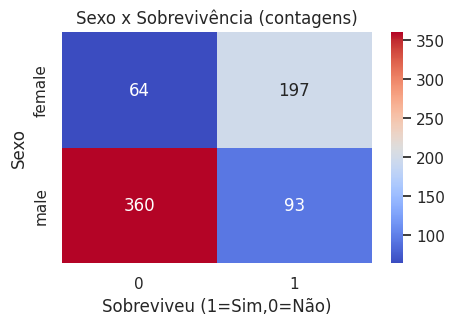

Tabulação cruzada - Classe x Sexo (contagens):



Sex,female,male
Pclass,,
1,85,101
2,74,99
3,102,253


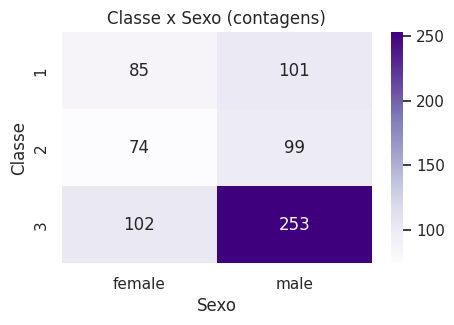

Taxa de sobrevivência (%) por Classe e Sexo:



Survived          0     1
Pclass Sex               
1      female   3.5  96.5
       male    60.4  39.6
2      female   8.1  91.9
       male    84.8  15.2
3      female  53.9  46.1
       male    85.0  15.0

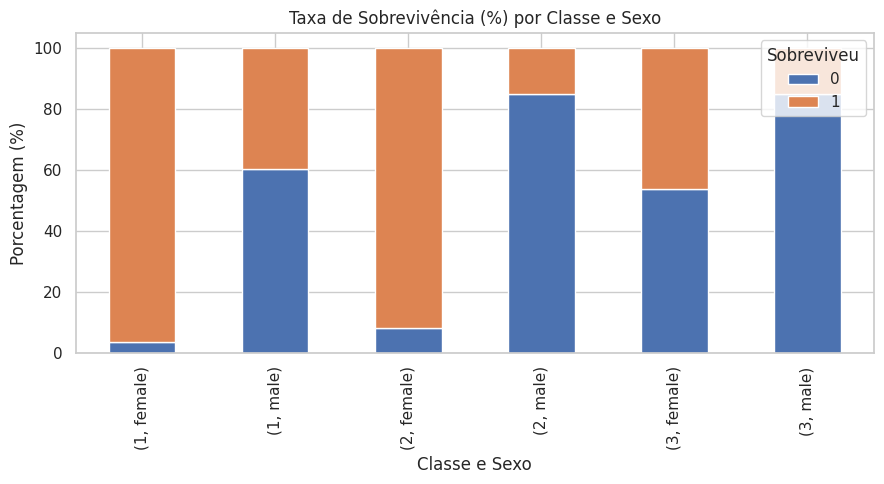

In [ ]:
# Crosstab 1: Sexo x Sobrevivência (contagens)
if set(['Sex','Survived']).issubset(df_work.columns):
    tab1 = pd.crosstab(df_work['Sex'], df_work['Survived'])
    print("Tabulação cruzada - Sexo x Sobrevivência (contagens):\n")
    display(tab1)
    plt.figure(figsize=(5,3))
    sns.heatmap(tab1, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Sexo x Sobrevivência (contagens)')
    plt.ylabel('Sexo')
    plt.xlabel('Sobreviveu (1=Sim,0=Não)')
    plt.show()
else:
    print("Faltam colunas para Sexo x Sobrevivência.")

# Crosstab 2: Classe x Sexo (contagens)
if set(['Pclass','Sex']).issubset(df_work.columns):
    tab2 = pd.crosstab(df_work['Pclass'], df_work['Sex'])
    print("Tabulação cruzada - Classe x Sexo (contagens):\n")
    display(tab2)
    plt.figure(figsize=(5,3))
    sns.heatmap(tab2, annot=True, fmt='d', cmap='Purples')
    plt.title('Classe x Sexo (contagens)')
    plt.ylabel('Classe')
    plt.xlabel('Sexo')
    plt.show()
else:
    print("Faltam colunas para Classe x Sexo.")

# Crosstab 3: Taxa de sobrevivência (%) por Classe e Sexo (normalizada por linha)
if set(['Pclass','Sex','Survived']).issubset(df_work.columns):
    tab3_pct = pd.crosstab([df_work['Pclass'], df_work['Sex']], df_work['Survived'], normalize='index') * 100
    tab3_pct = tab3_pct.round(1)
    print("Taxa de sobrevivência (%) por Classe e Sexo:\n")
    display(tab3_pct)
    # Plot empilhado
    ax = tab3_pct.plot(kind='bar', stacked=True, figsize=(9,5))
    ax.set_ylabel('Porcentagem (%)')
    ax.set_xlabel('Classe e Sexo')
    ax.set_title('Taxa de Sobrevivência (%) por Classe e Sexo')
    ax.legend(title='Sobreviveu', loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("Faltam colunas para calcular taxa de sobrevivência por Classe e Sexo.")


# 🧾 Conclusões da Análise – Dataset Titanic

Os resultados mostram que:

* Mulheres tiveram maior taxa de sobrevivência que os homens.

* Passageiros da 1ª e 2ª classe sobreviveram mais do que os da 3ª.

* Homens da 3ª classe foram o grupo com menor chance de sobrevivência.

👉 A sobrevivência no Titanic foi fortemente influenciada por sexo e classe social.